In [2]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

# Soluções da equação de Friedmann 

## Tempo

$H^2=H_0^2(\frac{\Omega_m}{a^3}+\frac{\Omega_r}{a^4}+\Omega_\Lambda$)

In [3]:
#Definindo o intervalo do fator de escala e o da idade

scale_factor=np.linspace(0.0,1.0,100)
age=np.empty(len(scale_factor))
age[0]=0.0

#Proporções do gráfico

plt.rcParams['figure.figsize']=[10,8]
plt.rcParams.update({'font.size':18})

In [4]:
Mpc2km= 3.1e19 # Mpc para km
seg2year= 3.2e-8 # segundos para ano

class Parameters:
    '''Classe que contém os parâmetros cosmológicos'''
    
    def __init__(self, H_0, Omega_m, Omega_rad, Omega_lambda, label ):
        self.H_0= H_0
        self.mat= Omega_m
        self.rad=  Omega_rad
        self.lamb= Omega_lambda
        self.label=label
        
    def Param(self):
        '''Retorna um tuple com os valores dos parâmetros e da mudança de unidades
        para ser aplicado no argumento args do quad'''
        
        return (self.H_0,Mpc2km, seg2year, self.mat, self.rad, self.lamb)
         
    def Age(self):
        '''Definição da equação de Friedmann como escrito acima.
        Cálculo da idade do Universo com a função quad
        Produção do gráfico'''
        
        Friedmann= lambda  a, H_0,Mpc2km, seg2year, Omega_m, Omega_rad, Omega_lambda : \
        ( a * self.H_0 / (Mpc2km * seg2year) *(self.mat / a**3 + self.rad / a**4 + self.lamb)**(1/2) )**(-1)
        
        for i in range (1,len(scale_factor)):
            age[i]=integrate.quad(Friedmann,0,scale_factor[i],args=self.Param())[0]
            
        
        ax.plot(scale_factor,age/10,label=self.label)
        ax.legend()
        ax.set_xlabel('Scale Factor')
        ax.set_ylabel('Age (Billions)')
        ax.set_title('Age of the Universe')
        return

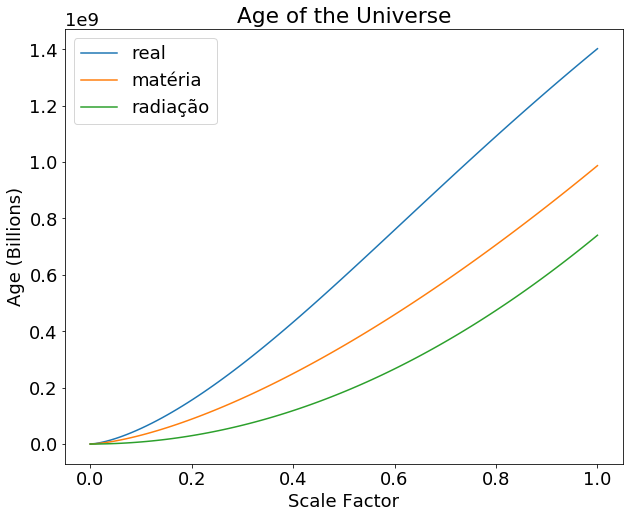

In [5]:
fig,ax=plt.subplots()


real=Parameters(66.98,0.320,0.0,0.680,'real')
real.Age()

materia=Parameters(66.98,1,0,0,'matéria')
materia.Age()

radiação=Parameters(66.98,0,1,0,'radiação')
radiação.Age()